In [12]:
import pandas as pd

import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("../data/knowledge-graph.csv")

In [4]:
df.head()

,Topic,Keyword,Count
0,0,et,93
1,0,al,93
2,0,cyber,93
3,0,dating,93
4,0,violence,93


In [8]:
# Add nodes with bipartite attribute
topics = df['Topic'].unique()
keywords = df['Keyword'].unique()

G.add_nodes_from(topics, bipartite=0)
G.add_nodes_from(keywords, bipartite=1)

# Add edges between topics and keywords
for _, row in df.iterrows():
    G.add_edge(row['Topic'], row['Keyword'])

# Check that the graph is bipartite
if not nx.is_bipartite(G):
    raise ValueError("Graph is not bipartite")

<Figure size 1500x1500 with 0 Axes>

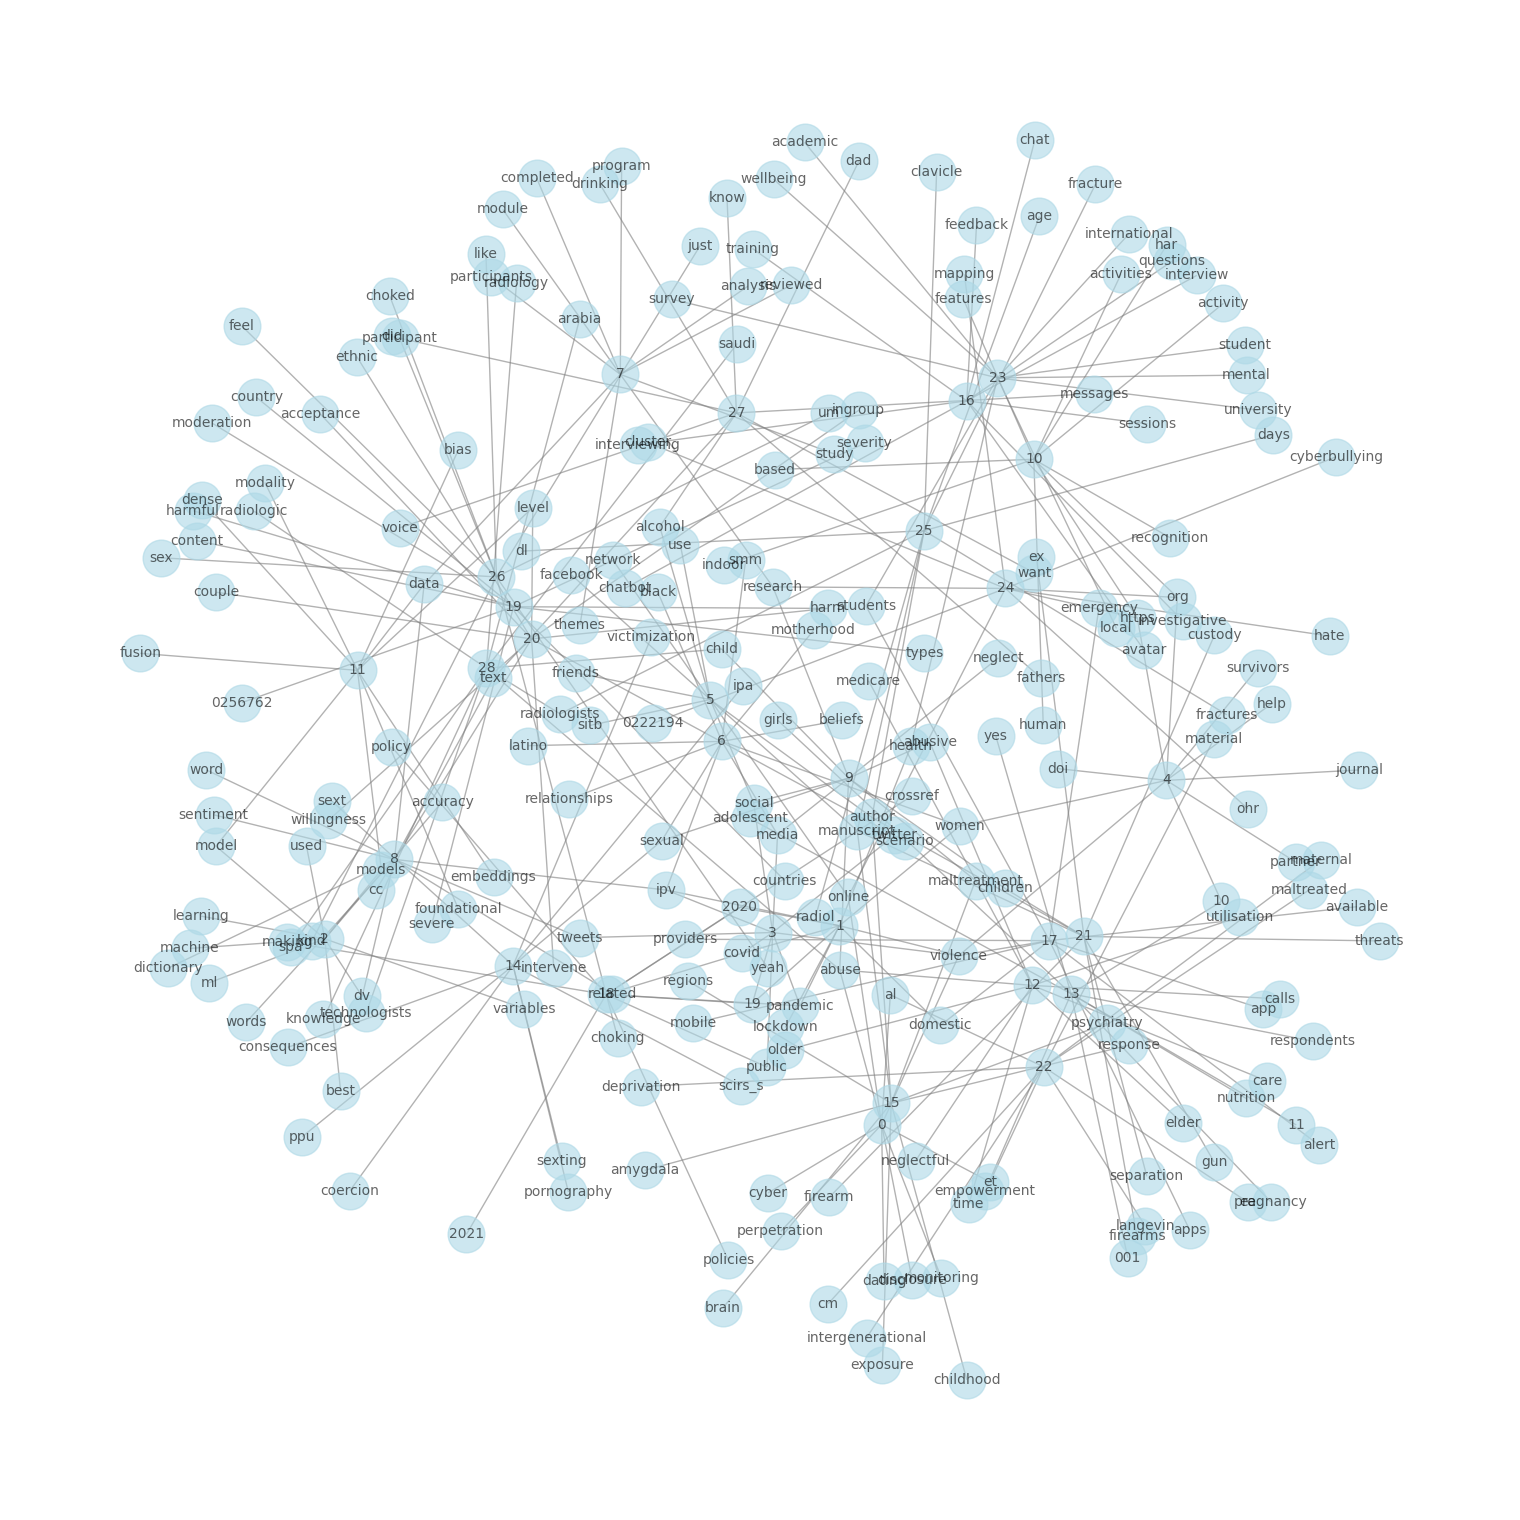

In [9]:
# Check if the graph is not empty
if len(G.nodes) == 0:
    print("The graph has no nodes.")
elif len(G.edges) == 0:
    print("The graph has no edges.")
else:
    pos = nx.spring_layout(G, seed=47, k=0.9)
    plt.figure(figsize=(15, 15))
    nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
    plt.show()

In [13]:
# Get the set of keyword nodes
keywords = [n for n, d in G.nodes(data=True) if d['bipartite'] == 1]

# Count the number of topics each keyword is connected to
keyword_count = Counter()
for keyword in keywords:
    keyword_count[keyword] = len(list(G.neighbors(keyword)))

# Print the most shared keywords
most_shared_keywords = keyword_count.most_common()
for keyword, count in most_shared_keywords:
    print(f"{keyword}: {count} topics")

violence: 5 topics
abuse: 4 topics
ipv: 4 topics
manuscript: 4 topics
author: 4 topics
online: 3 topics
women: 3 topics
covid: 3 topics
19: 3 topics
pandemic: 3 topics
media: 3 topics
social: 3 topics
https: 3 topics
org: 3 topics
sexual: 3 topics
data: 3 topics
research: 3 topics
et: 2 topics
al: 2 topics
health: 2 topics
2020: 2 topics
domestic: 2 topics
model: 2 topics
dv: 2 topics
models: 2 topics
public: 2 topics
tweets: 2 topics
10: 2 topics
alcohol: 2 topics
text: 2 topics
child: 2 topics
maltreatment: 2 topics
children: 2 topics
abusive: 2 topics
level: 2 topics
students: 2 topics
harm: 2 topics
radiologists: 2 topics
cyber: 1 topics
dating: 1 topics
disclosure: 1 topics
perpetration: 1 topics
monitoring: 1 topics
lockdown: 1 topics
accuracy: 1 topics
ml: 1 topics
learning: 1 topics
machine: 1 topics
best: 1 topics
used: 1 topics
variables: 1 topics
twitter: 1 topics
help: 1 topics
journal: 1 topics
partner: 1 topics
doi: 1 topics
survivors: 1 topics
network: 1 topics
friends: 

<Figure size 1200x1200 with 0 Axes>

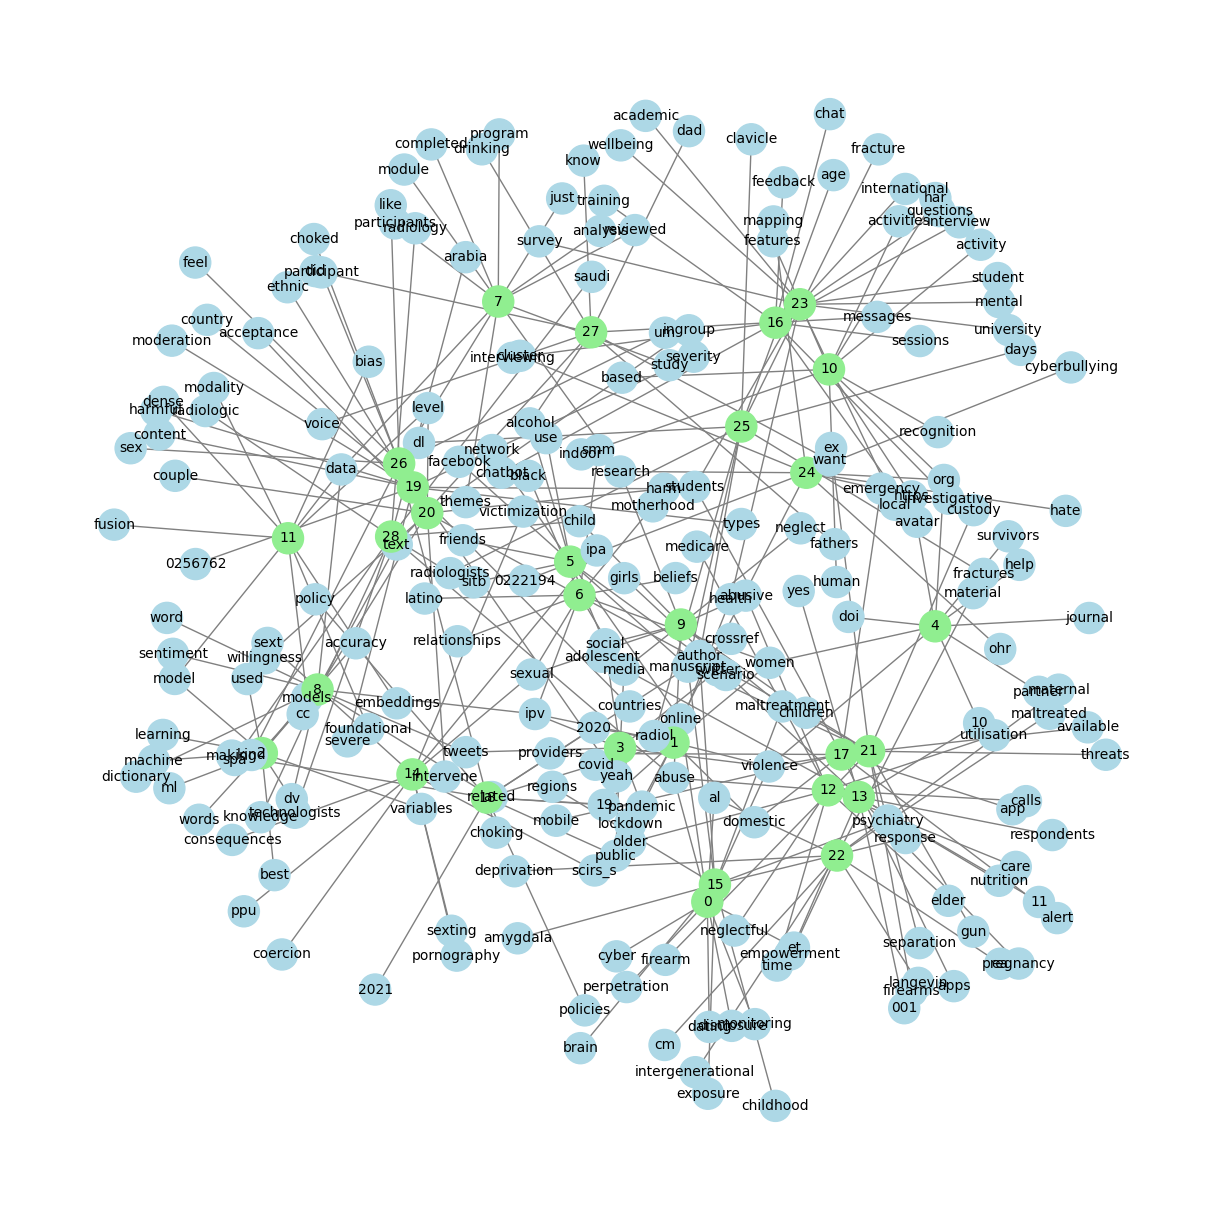

In [15]:
# Draw the bipartite graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_color=['lightgreen' if n in topics else 'lightblue' for n in G.nodes()], node_size=500, edge_color='gray', font_size=10)
plt.show()